<a href="https://www.kaggle.com/code/hebaatef/dogs-vs-cats-classification-using-keras-cnn?scriptVersionId=90933990" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


# **Import Libraries**

In [2]:
# For Preparing Data
import os
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, load_img
import random

# For Building Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

# **Define Constants**

In [3]:
# For Preparing Data
DATA_DIR = "../data"
TRAIN_DIR = "../data/train/"
TEST_DIR = "../data/test1/"

ZIP_TRAIN_DIR = "../input/dogs-vs-cats/train.zip"
ZIP_TEST_DIR = "../input/dogs-vs-cats/test1.zip"

# For Building Model
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_CHANNELS = 3

# 1. Prepare Input Data

Create a directory to unzip the training & testing data both in different directories. But first check if that directory already exists

Then unzip the data into its directory

In [4]:
# check if the directories already exist then dont make them
if not os.path.exists(DATA_DIR):
    os.mkdir(DATA_DIR)
    
    with ZipFile(ZIP_TRAIN_DIR) as zf:
        zf.extractall(DATA_DIR)
    
    with ZipFile(ZIP_TEST_DIR) as zf:
        zf.extractall(DATA_DIR)

Have a look inside the folders we created

In [5]:
for dirname, _, filenames in os.walk(DATA_DIR):
    for index, filename in enumerate(filenames):
        if index < 3:
            print(os.path.join(dirname, filename))
            
        else:
            print("** **")
            break

../data/test1/10435.jpg
../data/test1/6790.jpg
../data/test1/4644.jpg
** **
../data/train/dog.890.jpg
../data/train/dog.1178.jpg
../data/train/dog.7845.jpg
** **


Now, let's prepare our training data into data frame

Giving a dog value of 1 and a cat value of 0

In [6]:
train_files = os.listdir(TRAIN_DIR)
categories = []

for file in train_files:
    category = file.split('.')[0]
    
    if category == "dog":
        categories.append(1)
    else:
        categories.append(0)
        
df = pd.DataFrame({
    'filename': train_files,
    'category': categories
})

Have a look of the data frame

In [7]:
df.head()

,filename,category
0,dog.890.jpg,1
1,dog.1178.jpg,1
2,dog.7845.jpg,1
3,dog.4632.jpg,1
4,cat.3660.jpg,0


see the data charts of data frames

<AxesSubplot:>

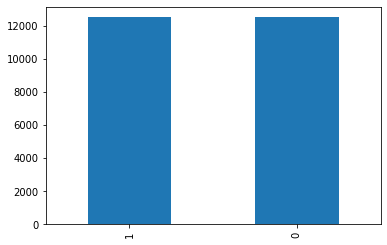

In [8]:
df['category'].value_counts().plot.bar()

see a sample image

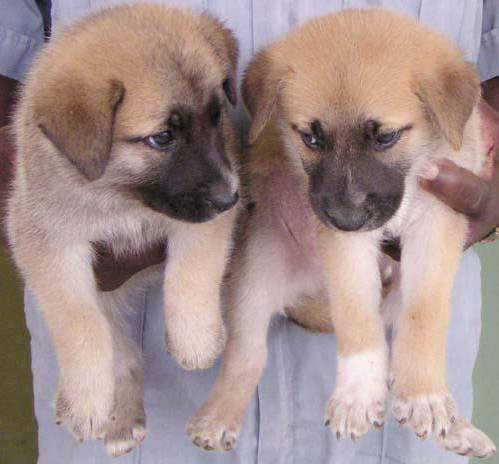

In [9]:
# using PIL
img_path = os.path.join(TRAIN_DIR, random.choice(train_files))
img = Image.open(os.path.join(img_path))
display(img)

# using matplot
# img = load_img(img_path)
# plt.imshow(img)

# 2. Build Model

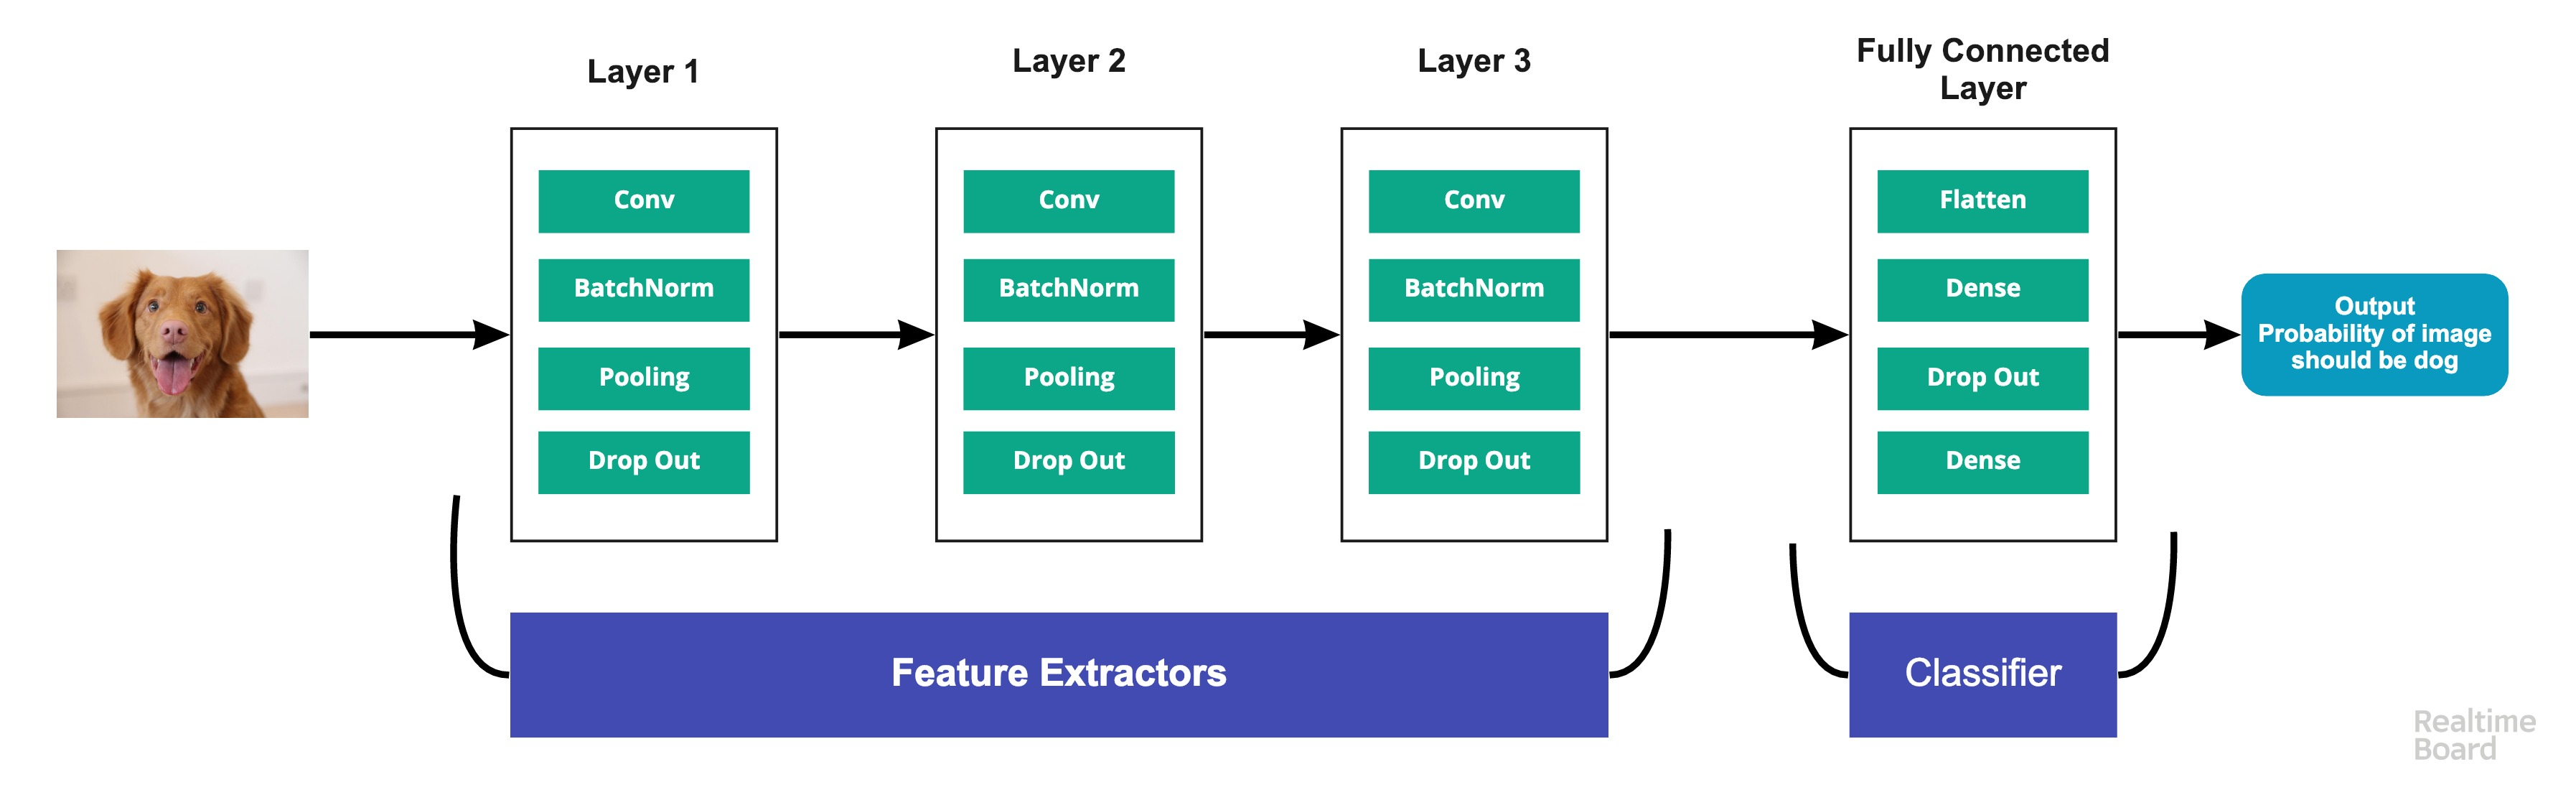

Input Layer: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.

Conv Layer: This layer will extract features from image.

Pooling Layer: This layerreduce the spatial volume of input image after convolution.

Fully Connected Layer: It connect the network from a layer to another layer.

Output Layer: It is the predicted values layer.

In [10]:
def add_FE_layer(model, num_filters, kernel_size, _input_shape, _pool_size, drop_rate):
    model.add(Conv2D(num_filters, kernel_size, activation='relu', input_shape=_input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=_pool_size))
    model.add(Dropout(drop_rate))
    return model

model = Sequential()
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
model = add_FE_layer(model, 32, (3, 3), input_shape, (2, 2), 0.25)
model = add_FE_layer(model, 64, (3, 3), input_shape, (2, 2), 0.25)
model = add_FE_layer(model, 128, (3, 3), input_shape, (2, 2), 0.25)

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

2022-03-22 11:35:29.059532: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

# References:
Notebook: [link](https://www.kaggle.com/code/uysimty/keras-cnn-dog-or-cat-classification/notebook)

Creating a model: [link](https://pyimagesearch.com/2019/10/28/3-ways-to-create-a-keras-model-with-tensorflow-2-0-sequential-functional-and-model-subclassing/)